In [24]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import sys
import yt

src_path = os.path.abspath(os.path.join(os.getcwd(), '.', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)

import datfile_io
import morton_amr

datfile = r'./data/tdm0.dat'
datfile1 = r'./data/tdm1.dat'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
with open(datfile, 'rb+') as fi:
    datfile_io.write_new_datfile(fi, datfile1, [2,4], [2,4], [2,4])
    with open(datfile1, 'rb+') as fw:
        header = datfile_io.get_header(fw)
        forest = datfile_io.get_forest(fw)
        tree = datfile_io.get_tree_info(fw)
        datfile_io.check_tree(fw)

AttributeError: module 'datfile_io' has no attribute 'get_tree'

In [37]:
len(forest)

72

In [27]:
t1 = yt.load(datfile)
t2 = yt.load(datfile1)

st1 = yt.SlicePlot(t1, 'z', 'b2')
st2 = yt.SlicePlot(t2, 'z', 'b2')

yt : [WARNING  ] 2024-08-29 10:48:56,971 'staggered' flag was found, but is currently ignored (unsupported)
yt : [INFO     ] 2024-08-29 10:48:57,013 Parameters: current_time              = 0.4
yt : [INFO     ] 2024-08-29 10:48:57,014 Parameters: domain_dimensions         = [48 48 48]
yt : [INFO     ] 2024-08-29 10:48:57,015 Parameters: domain_left_edge          = [-4. -4.  0.]
yt : [INFO     ] 2024-08-29 10:48:57,015 Parameters: domain_right_edge         = [4. 4. 8.]
yt : [INFO     ] 2024-08-29 10:48:57,016 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-08-29 10:48:57,034 'staggered' flag was found, but is currently ignored (unsupported)
yt : [INFO     ] 2024-08-29 10:48:57,061 Parameters: current_time              = 0.4
yt : [INFO     ] 2024-08-29 10:48:57,062 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2024-08-29 10:48:57,063 Parameters: domain_left_edge          = [-1.33333333 -1.33333333  2.66666667]
yt : [INFO     ] 2024-08-29 10:48:57,064 


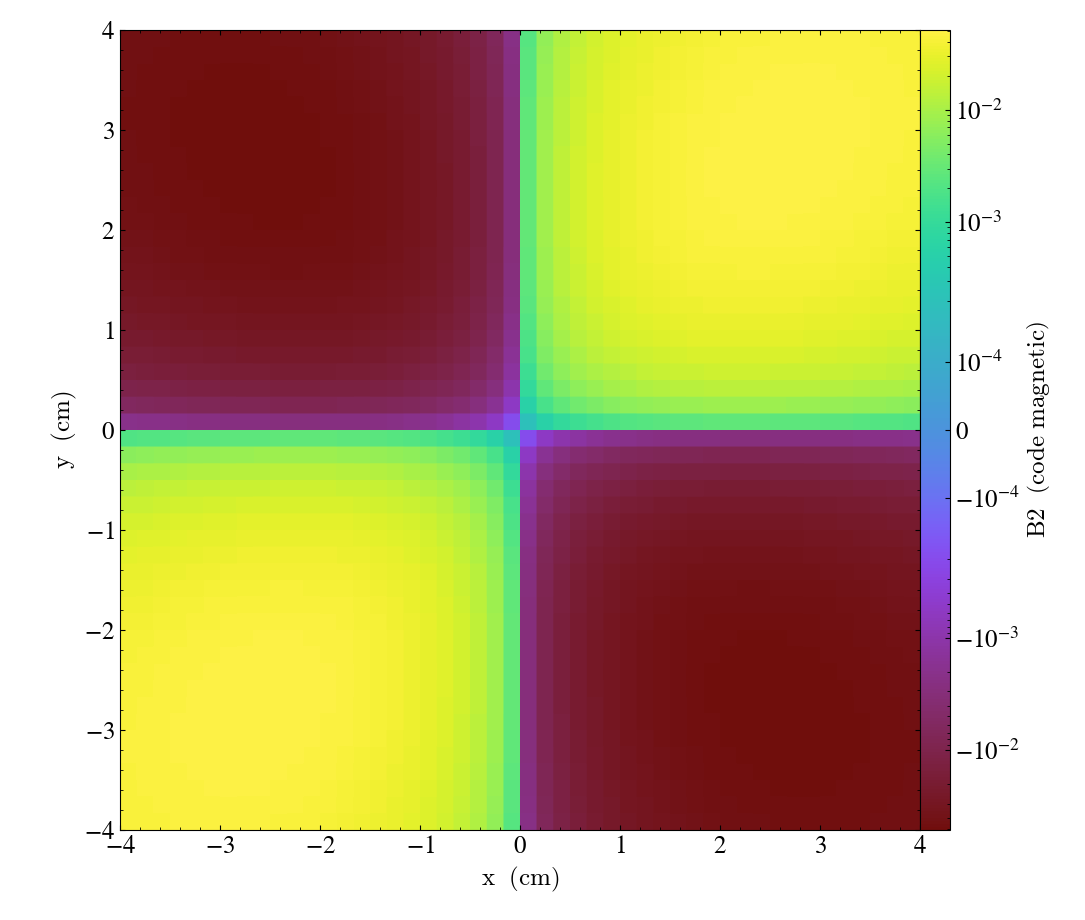

In [28]:
st1.show()


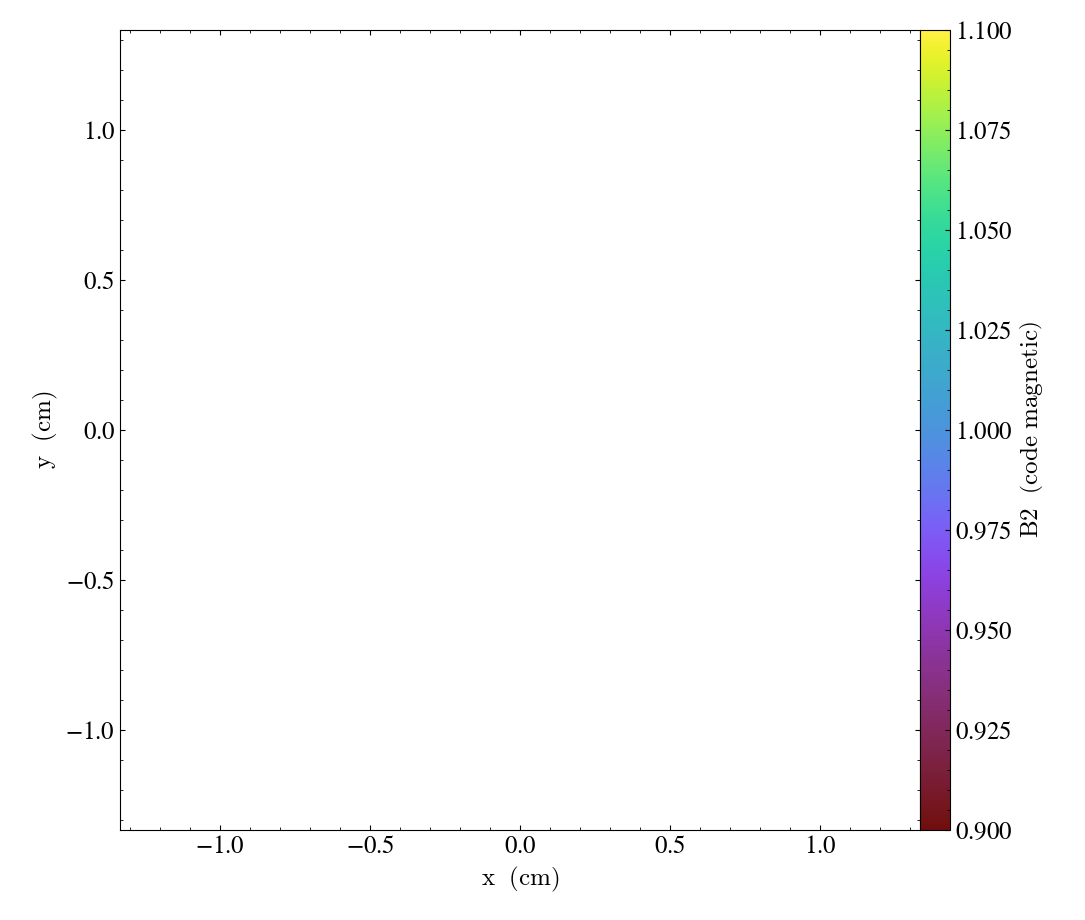

In [29]:
st2.show()

In [34]:
point = [1, 1, 4]
fv1= t1.find_field_values_at_point(('amrvac', 'b3'), point)
fv2= t2.find_field_values_at_point(('amrvac', 'b3'), point)
fv1, fv2

(unyt_array([0.10876199], 'code_magnetic'),
 unyt_array([], dtype=float64, units='code_magnetic'))